In [130]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/iqQgED9vV7k" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

In [131]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Using handwritten data from keras

In [132]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

In [133]:
len(X_train)

60000

In [134]:
len(X_test)

10000

In [135]:
X_train[0].shape

(28, 28)

In [136]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

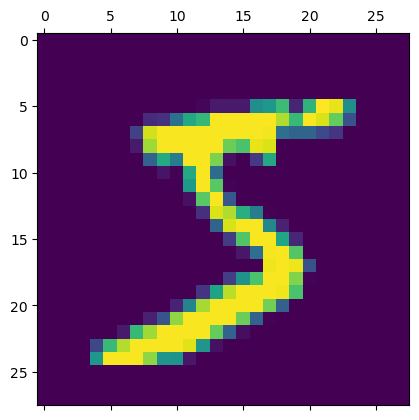

In [137]:
plt.matshow(X_train[0])

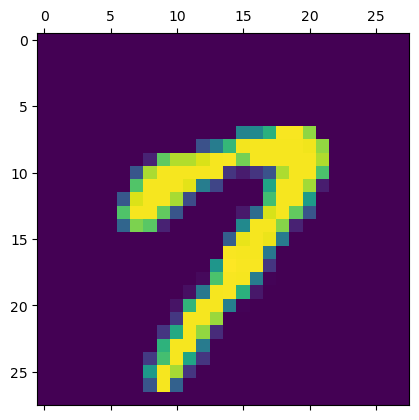

In [138]:
plt.matshow(X_train[15])

In [139]:
Y_train[15]

7

In [140]:
Y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

## Flatten the training dataset

* reshape so that the 28x28 features of each of the observation are in one vector i.e.
    * move from 60000*28*28 -> 60000*784

In [141]:
X_train.shape

(60000, 28, 28)

In [142]:
X_train = X_train/ 255
X_test = X_test / 255 # standardizing

In [143]:
X_train_flattened = X_train.reshape(len(X_train),28*28 )
X_test_flattened = X_test.reshape(len(X_test),28*28 )
X_train_flattened.shape

(60000, 784)

In [144]:
X_test_flattened.shape

(10000, 784)

In [145]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## Create a simple neural network
    * dense means each feauture is connected to each hidden layer
    * output: 10 (0, 1, .., 9),
    * input the 28*28 =784 flattened features 

In [146]:
model = keras.Sequential([
keras.layers.Dense(10, input_shape= (784, ), activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, Y_train, epochs=5) # training

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4681 - accuracy: 0.8764
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3035 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2830 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2729 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2664 - accuracy: 0.9259


* evaluate the model on the test dataset

In [147]:
model.evaluate(X_test_flattened, Y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2692 - accuracy: 0.9249


[0.26923564076423645, 0.9248999953269958]

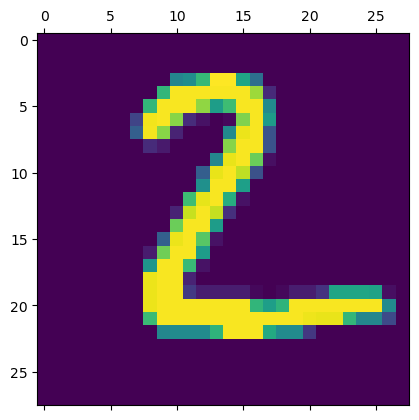

In [148]:
plt.matshow(X_test[1])

In [149]:
Y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 0s 1ms/step


In [150]:
Y_predicted[1]

array([4.9759382e-01, 8.6590517e-03, 9.9944150e-01, 4.2268795e-01,
       9.1633734e-10, 8.8741034e-01, 8.6080617e-01, 6.8506670e-13,
       1.6105126e-01, 1.9080961e-09], dtype=float32)

In [151]:
np.argmax(Y_predicted[1])

2

* confusion mmatrix

In [152]:
Y_predicted_labels = [np.argmax(i) for i in Y_predicted]
Y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [153]:
cm = tf.math.confusion_matrix(labels = Y_test, predictions=Y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    1,    1,    0,    5,    3,    3,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   5,    9,  939,   16,    9,    2,   11,   10,   29,    2],
       [   3,    0,   23,  919,    0,   29,    2,   12,   15,    7],
       [   2,    2,    9,    0,  926,    0,    6,    4,    9,   24],
       [  10,    3,    7,   31,   10,  783,   11,    6,   26,    5],
       [  14,    3,    9,    1,    8,   14,  905,    2,    2,    0],
       [   1,    7,   26,    4,    8,    1,    0,  957,    1,   23],
       [  10,   13,    8,   26,    9,   36,    8,   13,  845,    6],
       [  11,    7,    1,   11,   39,   10,    0,   33,    6,  891]])>

Text(95.72222222222221, 0.5, 'Truth')

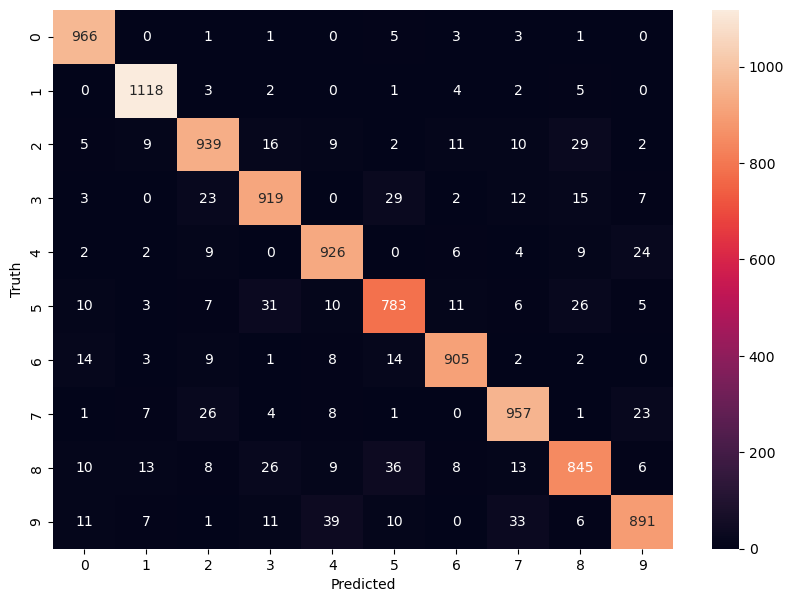

In [154]:
import seaborn as sn
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Add a hidden layer

In [155]:
model = keras.Sequential([ # only 1 hidden layer. You can add some more
    keras.layers.Dense(100, input_shape= (784, ), activation='relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, Y_train, epochs=5) # training

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2765 - accuracy: 0.9219
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1289 - accuracy: 0.9621
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0886 - accuracy: 0.9733
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0677 - accuracy: 0.9796
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0533 - accuracy: 0.9834


In [156]:
model.evaluate(X_test_flattened, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0774 - accuracy: 0.9755


[0.07740083336830139, 0.9754999876022339]

313/313 [==============================] - 1s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

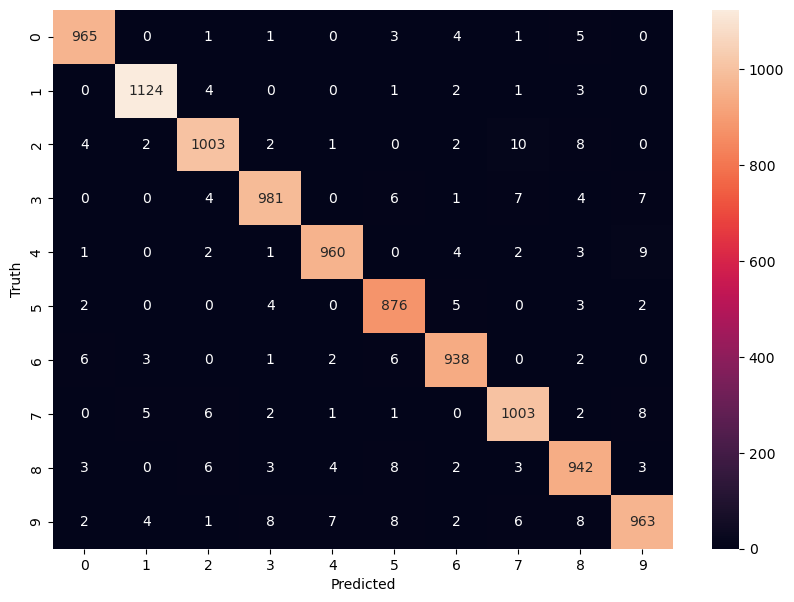

In [157]:

Y_predicted = model.predict(X_test_flattened)
Y_predicted_labels = [np.argmax(i) for i in Y_predicted]
cm = tf.math.confusion_matrix(labels = Y_test, predictions=Y_predicted_labels)
cm

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## flatten automatically from keras
## visualize how neural networks trains itself using Tensorboard

In [158]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/9SdLOcGnebU" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

In [159]:
#conda install -c conda-forge tensorboard

In [160]:
model = keras.Sequential([ # only 1 hidden layer. You can add some more
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(100, input_shape= (784, ), activation='relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

# tensorboard
tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)


model.compile(
    optimizer = 'SGD',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train, Y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6561 - accuracy: 0.8333
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3385 - accuracy: 0.9050
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2908 - accuracy: 0.9182
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2612 - accuracy: 0.9256
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2391 - accuracy: 0.9331


In [161]:
%load_ext tensorboard
%tensorboard --logdir logs/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 8400), started 0:17:56 ago. (Use '!kill 8400' to kill it.)

# Activation Functions

In [162]:
import math

def sigmoid(x):
    return 1/ (1 + math.exp(-x))

In [163]:
sigmoid(1246)

1.0

In [164]:
sigmoid(1)

0.7310585786300049

In [165]:
sigmoid(-56)

4.780892883885469e-25

* gradient of sigmoid: tanh

In [166]:
def tanh(x):
    return (math.exp(x) - math.exp(-x))/ (math.exp(x) + math.exp(-x))

In [167]:
tanh(-56)

-1.0

In [168]:
tanh(50)

1.0

* ReLU

In [169]:
def relu(x):
    return max(0, x)

In [170]:
relu(-7)

0

In [171]:
relu(100)

100

* Leaky relu

In [172]:
def leaky_relu(x):
    return max(0.1*x, x)

In [173]:
leaky_relu(-100)

-10.0

In [174]:
leaky_relu(8)

8